In [4]:
import os
import random
from PIL import Image, ImageDraw

from dotenv import load_dotenv
import matplotlib.pyplot as plt

import google.generativeai as genai

load_dotenv()

True

In [5]:
GOOGLE_API_KEY = os.getenv("GEMINI_API_KEY")
genai.configure(api_key=GOOGLE_API_KEY)

In [6]:
# --- INIT GEMINI
model = genai.GenerativeModel('gemini-1.5-pro-latest')

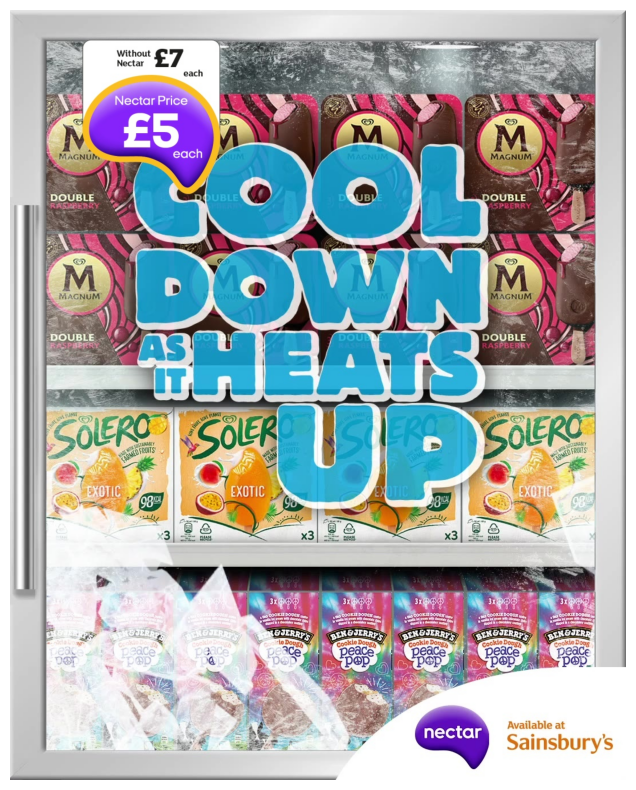

In [10]:
# --- GET IMAGE
synth_dir = "archive/data/imgs/synth"
img_files = os.listdir(synth_dir)
random_img = random.choice(img_files)
img_path = os.path.join(synth_dir, random_img)

img = Image.open(img_path)
template = Image.open("archive/data/brand_assets/processed/nectar_lozenge/Artboard 2_1.png")

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis('off')
plt.show()

In [11]:
prompt = """ 
You are an expert Computer Vision system spacialise at template matching.

Return bounding boxes around every Nectar Price Logo Template present in the target image. 
For each one return [ymin, xmin, ymax, xmax]
The bounding box must encolse the entire template, including any variations in size or orientation.

The template is provided, alongside the target image.


Your response must be a valid json object, containing an array of bounding boxes only in the fomat:
{
    "bounding_boxes": [
        [ymin, xmin, ymax, xmax],
        [ymin, xmin, ymax, xmax],
        ...
    ]
}

"""

response = model.generate_content([prompt, img, template])
print(response.text)

```json
{
  "bounding_boxes": [
    [
      103,
      155,
      190,
      300
    ]
  ]
}
```


In [12]:
import json

# Strip leading/trailing spaces
clean_text = response.text.strip()

# Remove Markdown-style formatting
if clean_text.startswith("```json"):
    clean_text = clean_text[7:]  # Remove ```json
if clean_text.endswith("```"):
    clean_text = clean_text[:-3]  # Remove closing ```

# Now parse the cleaned string as JSON
try:
    bboxes = json.loads(clean_text)
    print("Parsed JSON:", bboxes)
except json.JSONDecodeError as e:
    print("JSON Parsing Error:", e)
    print("Raw Response:", clean_text)

Parsed JSON: {'bounding_boxes': [[103, 155, 190, 300]]}


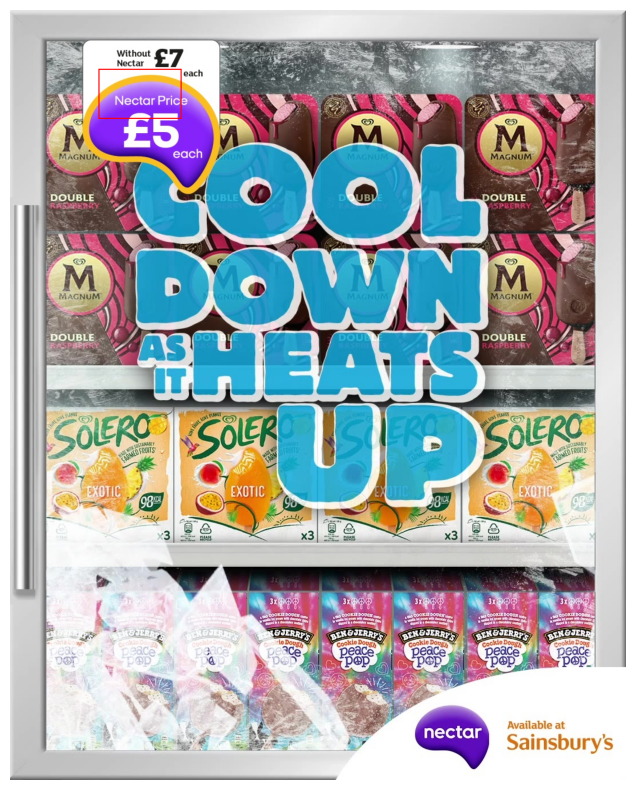

In [13]:
import ast
bboxes = [[103, 155, 190, 300]]

img_with_boxes = img.copy()
draw = ImageDraw.Draw(img_with_boxes)

for bbox in bboxes:
    ymin, xmin, ymax, xmax = bbox
    draw.rectangle([(xmin, ymin), (xmax, ymax)], outline='red', width=2)

plt.figure(figsize=(10,10))
plt.imshow(img_with_boxes)
plt.axis('off')
plt.show()